In [68]:
# import libraries
import os
import cv2 as cv
import shutil
import time

In [69]:
# defining file paths
folder_path = os.getcwd()

inputFolder = os.path.join(folder_path,'InputImages')
outputFolder = os.path.join(folder_path,'OutputImages_singlethread')

In [70]:
# create output folder, if not available
try:
    shutil.rmtree(outputFolder)
    os.mkdir(outputFolder)
except:
    os.mkdir(outputFolder)

In [71]:
# code for image preprocessing (converting colored files to grayscale images)
def rgb_to_grayscale(img_name):

    inputImage = os.path.join(inputFolder,img_name)
    img = cv.imread(inputImage)

    if(img is not None):
        #convert to grayscale and store file
        gray_scale = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

        outputFile = os.path.join(outputFolder,'processed_{}'.format(img_name)) 
        cv.imwrite(outputFile,gray_scale)

In [72]:
# import the images
allImages = os.listdir(inputFolder)

In [73]:
# if images are less than 500, exit the program 
if(len(allImages)<500):
    print('Not enough files in InputImages folder')
    exit(0)

In [74]:
def no_multithreading(file):
    with file:
        for j in range(100,1001,100):
            i = 0 

            start_bundle = time.time()
            for img in allImages:
                rgb_to_grayscale(img)
                if(i==j):
                    break
                i+=1

            end_bundle = time.time()
            file.write(str(j) + ' ' + str(end_bundle-start_bundle) + '\n')
            print('Number of Images:', j, ' - Time taken:', end_bundle-start_bundle, 'sec')

In [75]:
# saving reports
dirname = 'Compare'
if not os.path.exists(dirname):
    os.mkdir(os.path.join(os.getcwd(),dirname))

In [76]:
compare = open('{}/report_no_multithreading'.format(os.path.join(os.getcwd(),dirname)) ,'w')

In [77]:
# calling function
no_multithreading(compare)

Number of Images: 100  - Time taken: 2.119551181793213 sec
Number of Images: 200  - Time taken: 3.9649529457092285 sec
Number of Images: 300  - Time taken: 7.550985813140869 sec
Number of Images: 400  - Time taken: 9.38367223739624 sec
Number of Images: 500  - Time taken: 11.760257482528687 sec
Number of Images: 600  - Time taken: 15.352954149246216 sec
Number of Images: 700  - Time taken: 18.767366409301758 sec
Number of Images: 800  - Time taken: 22.493075132369995 sec
Number of Images: 900  - Time taken: 22.905404806137085 sec
Number of Images: 1000  - Time taken: 26.21841025352478 sec


CPU Utilization during No-multithreading image processing

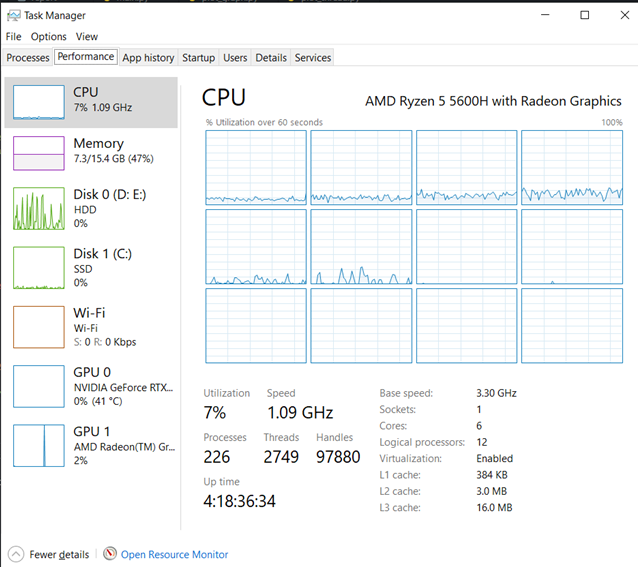